In [60]:
n = x_test.shape[0]
p = x_test.shape[1]

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adjusted_r2

0.8439580473533044

In [59]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2

0.8450003537444875

In [58]:
y_pred = model.predict(x_test)

In [56]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [51]:
from sklearn.model_selection import train_test_split

x = final_df.drop('price', axis=1)
y = final_df['price']

In [44]:
final_df = df_encoded[
    ["year", "price", "tax", "mpg", "engineSize", "model_ Kuga", "model_ Fiesta", "transmission_Manual", "fuelType_Petrol",
     "model_ Edge", "model_ Ka+", "model_ Focus", "model_ KA", "model_ S-MAX", "model_ Galaxy", "transmission_Semi-Auto",
     "model_ Puma", "model_ C-MAX", "model_ Tourneo Custom", "model_ Mustang", "model_ Grand C-MAX", "mileage",
     "model_ EcoSport", "model_ Fusion", "model_ Grand Tourneo Connect"]
]


In [37]:
chi2_df

,chi2_stat,p_val,decison
year,12153.089936,0.0,Reject Null (Keep Feature)
tax,6276.358489,0.0,Reject Null (Keep Feature)
mpg,9005.001679,0.0,Reject Null (Keep Feature)
engineSize,3566.314279,0.0,Reject Null (Keep Feature)
model_ Kuga,1815.281036,0.0,Reject Null (Keep Feature)
model_ Fiesta,2446.046072,0.0,Reject Null (Keep Feature)
transmission_Manual,931.764446,0.0,Reject Null (Keep Feature)
fuelType_Petrol,827.675386,0.0,Reject Null (Keep Feature)
model_ Edge,618.691706,0.0,Reject Null (Keep Feature)
model_ Ka+,593.868402,0.0,Reject Null (Keep Feature)


In [27]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05

df_encoded["price_bin"] = pd.qcut(df_encoded["price"], q=4, labels=False)
chi2_result = {}

for col in cat_feature:
    contigency = pd.crosstab(df_encoded[col], df_encoded["price_bin"])
    chi2_stat, p_val, _, _  = chi2_contingency(contigency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_result[col] = {
        "chi2_stat": chi2_stat,
        "p_val": p_val,
        "decison": decision
    }

chi2_df = pd.DataFrame(chi2_result).T
chi2_df = chi2_df.sort_values(by="p_val")   

In [21]:
cat_feature = [
    'year', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ C-MAX',
       'model_ EcoSport', 'model_ Edge', 'model_ Escort', 'model_ Fiesta',
       'model_ Focus', 'model_ Fusion', 'model_ Galaxy', 'model_ Grand C-MAX',
       'model_ Grand Tourneo Connect', 'model_ KA', 'model_ Ka+',
       'model_ Kuga', 'model_ Mondeo', 'model_ Mustang', 'model_ Puma',
       'model_ Ranger', 'model_ S-MAX', 'model_ Streetka',
       'model_ Tourneo Connect', 'model_ Tourneo Custom',
       'model_ Transit Tourneo', 'model_Focus', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Electric', 'fuelType_Hybrid',
       'fuelType_Other', 'fuelType_Petrol'
]

In [38]:
correlation_df

,Feature,Correlation
0,year,0.636009
4,engineSize,0.495327
2,tax,0.406857
17,model_ Kuga,0.281025
19,model_ Mustang,0.265964
7,model_ Edge,0.240388
22,model_ S-MAX,0.148523
29,transmission_Semi-Auto,0.141278
12,model_ Galaxy,0.133010
20,model_ Puma,0.129318


In [19]:
from scipy.stats import pearsonr

selected_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ C-MAX',
       'model_ EcoSport', 'model_ Edge', 'model_ Escort', 'model_ Fiesta',
       'model_ Focus', 'model_ Fusion', 'model_ Galaxy', 'model_ Grand C-MAX',
       'model_ Grand Tourneo Connect', 'model_ KA', 'model_ Ka+',
       'model_ Kuga', 'model_ Mondeo', 'model_ Mustang', 'model_ Puma',
       'model_ Ranger', 'model_ S-MAX', 'model_ Streetka',
       'model_ Tourneo Connect', 'model_ Tourneo Custom',
       'model_ Transit Tourneo', 'model_Focus', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Electric', 'fuelType_Hybrid',
       'fuelType_Other', 'fuelType_Petrol']

correlation = {
    feature : pearsonr(df_encoded[feature], df_encoded['price'])[0]
    for feature in selected_features
}
    
correlation_df = pd.DataFrame(list(correlation.items()), columns=['Feature', 'Correlation'])
correlation_df.sort_values(by='Correlation', ascending=False, inplace=True)

In [39]:
df_encoded.columns

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ C-MAX',
       'model_ EcoSport', 'model_ Edge', 'model_ Escort', 'model_ Fiesta',
       'model_ Focus', 'model_ Fusion', 'model_ Galaxy', 'model_ Grand C-MAX',
       'model_ Grand Tourneo Connect', 'model_ KA', 'model_ Ka+',
       'model_ Kuga', 'model_ Mondeo', 'model_ Mustang', 'model_ Puma',
       'model_ Ranger', 'model_ S-MAX', 'model_ Streetka',
       'model_ Tourneo Connect', 'model_ Tourneo Custom',
       'model_ Transit Tourneo', 'model_Focus', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Electric', 'fuelType_Hybrid',
       'fuelType_Other', 'fuelType_Petrol', 'price_bin'],
      dtype='object')

In [16]:
df_encoded

,year,price,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.065128,12000,-0.380998,0.591358,-0.042122,-0.447984,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.552866,14000,-0.733359,0.591358,-0.042122,-0.447984,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.065128,13000,-0.560132,0.591358,-0.042122,-0.447984,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1.040605,17500,-0.662640,0.510727,-1.721198,-0.447984,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,1.040605,16500,-1.123724,0.510727,-0.931045,-0.447984,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,0.065128,8999,-0.342172,0.591358,-1.029814,-0.447984,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,-1.398088,7499,0.890398,-1.343791,-0.042122,-0.447984,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17963,-0.910349,9999,-0.839822,-1.505053,0.945569,-0.447984,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17964,0.552866,8299,-0.942690,0.510727,-0.042122,-0.447984,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [15]:
from sklearn.preprocessing import StandardScaler

cols = ["year", "mileage", "tax", "mpg", "engineSize"]

scaler = StandardScaler()
df_encoded[cols] = scaler.fit_transform(df_encoded[cols])

In [14]:
df_encoded = df_encoded.astype(int)
df_encoded.head()

,year,price,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,15944,150,57,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2018,14000,9083,150,57,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2017,13000,12456,150,57,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2019,17500,10460,145,40,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,2019,16500,1482,145,48,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
df_encoded.head()

,year,price,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,15944,150,57.7,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2018,14000,9083,150,57.7,1.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2017,13000,12456,150,57.7,1.0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,2019,17500,10460,145,40.3,1.5,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,2019,16500,1482,145,48.7,1.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [12]:
df_encoded = pd.get_dummies(df, drop_first=True)

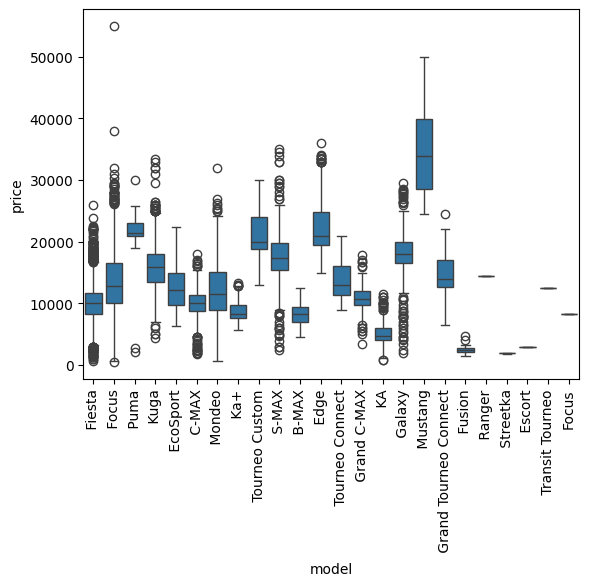

In [11]:
sns.boxplot(data = df, x="model", y="price")
plt.xticks(rotation=90)
plt.show()


<Axes: xlabel='engineSize', ylabel='price'>

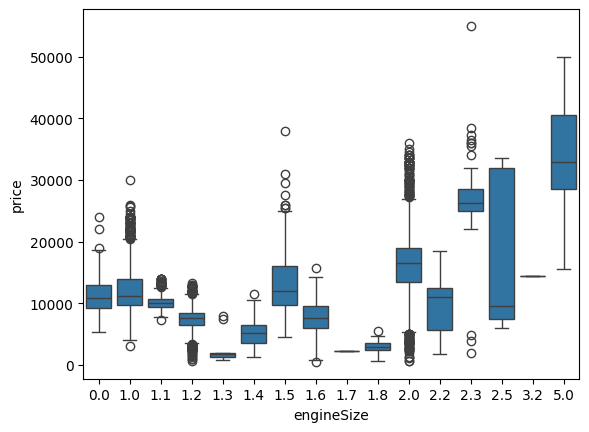

In [10]:
sns.boxplot(data = df, x="engineSize", y="price")

<Axes: xlabel='fuelType', ylabel='price'>

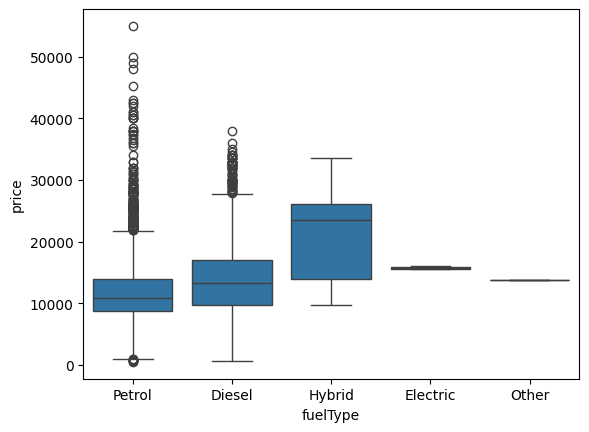

In [9]:
sns.boxplot(data = df, x="fuelType", y="price")

<Axes: xlabel='transmission', ylabel='price'>

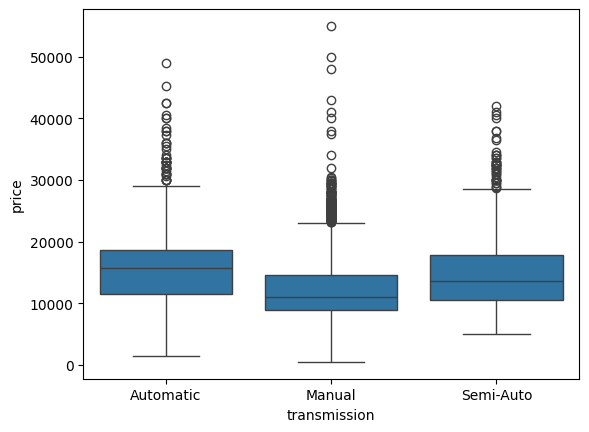

In [8]:
sns.boxplot(data = df, x="transmission", y="price")

<Axes: >

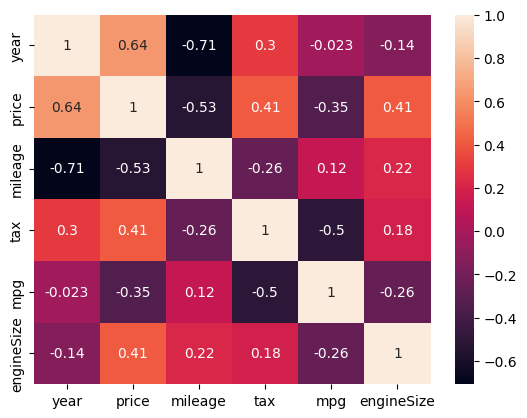

In [7]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [6]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


<Axes: xlabel='price', ylabel='Count'>

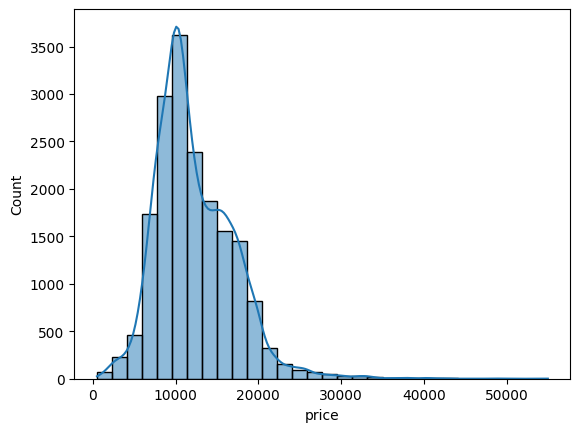

In [5]:
sns.histplot(df["price"], bins = 30, kde = True)

In [4]:
df.isnull().sum().sum()

np.int64(0)

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [2]:
df = pd.read_csv("ford.csv")

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")